In [151]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import feature_selection, linear_model, cross_validation 
pd.set_option ('display.max_rows', 10)
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 11)

%matplotlib inline 
plt.style.use ('ggplot')

In [152]:
df = pd.read_csv('auto-mpg.csv')

In [153]:
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [154]:
df = df.drop('origin', 1)

In [155]:
df = df.drop('car_name',1)

In [156]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [157]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [158]:
model = smf.ols(formula = 'mpg ~ weight', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          2.97e-103
Time:                        21:14:17   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000        44.754    47.881
weight        -0.0077      0.000    -29.814      0.000        -0.008    -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

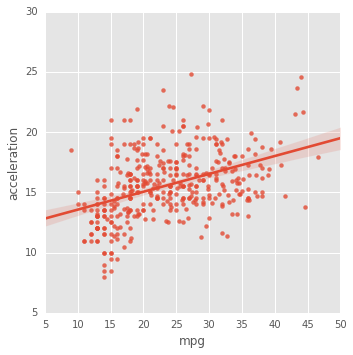

In [159]:
sns.lmplot(x = 'mpg', y = 'acceleration', data = df)

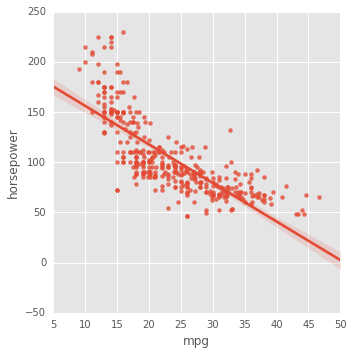

In [160]:
sns.lmplot(x = 'mpg', y = 'horsepower', data = df)

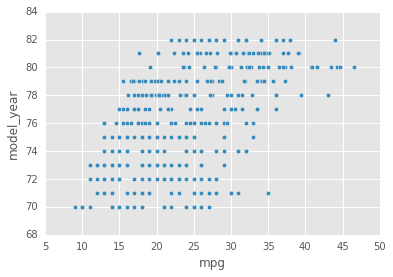

In [161]:
df.plot(kind = 'scatter', x = 'mpg', y = 'model_year')

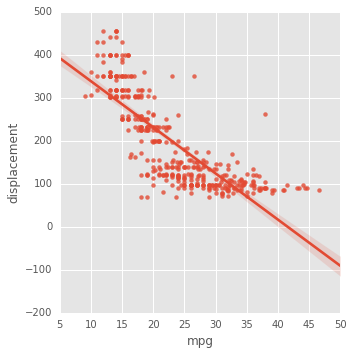

In [162]:
sns.lmplot(x = 'mpg', y = 'displacement', data = df)

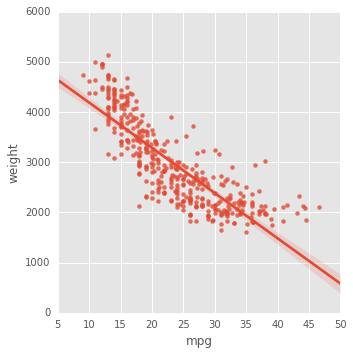

In [163]:
sns.lmplot(x = 'mpg', y = 'weight', data = df)

In [164]:
model = smf.ols(formula = 'mpg ~ horsepower + weight + displacement', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     312.0
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          5.10e-103
Time:                        21:14:20   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2249.
Df Residuals:                     388   BIC:                             2265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       44.8559      1.196     37.507      0.000        42.505    47.207
horsepower      -0.0417      0.013     -3.252      0.001        -0.067    -0.016
weight          -0.0054      0.001     -7.513      0.000        -0.007    -0.004
displacement    -0.0058      0.007     -0.876      0.381        -0.019     0.007
==============================================================================
Omnibus:                       37.603   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.946
Skew:                           0.707   Prob(JB):                     1.43e-11
Kurtosis:                       4.029   Cond. No.                     1.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
df[ ['displacement_sqrt', 'horsepower_sqrt'] ] = df[ ['displacement', 'horsepower'] ].apply(np.sqrt)

In [166]:
df [['displacement_log', 'horsepwer_log', 'weight_log', 'mpg_log']] = df [['displacement','horsepower', 'weight','mpg']].apply(np.log) 

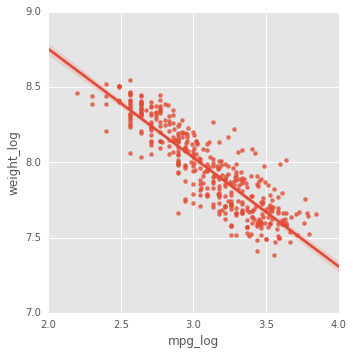

In [167]:
sns.lmplot(x = 'mpg_log', y = 'weight_log', data = df)

In [168]:
df['horsepower_inv'] = 1./ df.horsepower

In [169]:
 df['gpm'] = 1. / df.mpg

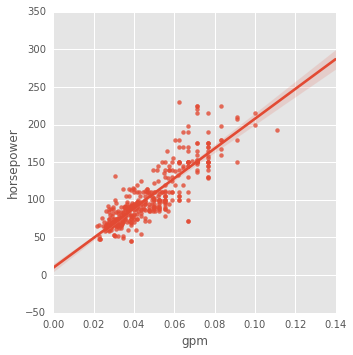

In [170]:
sns.lmplot(x = 'gpm', y = 'horsepower', data = df)

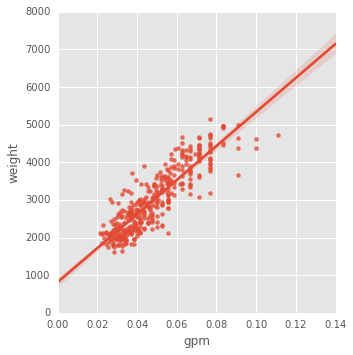

In [171]:
sns.lmplot(x = 'gpm', y = 'weight', data = df)

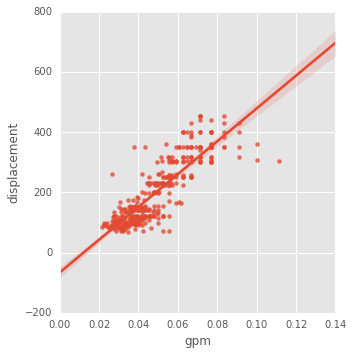

In [172]:
sns.lmplot(x = 'gpm', y = 'displacement', data = df)

In [173]:
model = smf.ols(formula = 'gpm ~ horsepower', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1058.
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          3.72e-113
Time:                        21:14:22   Log-Likelihood:                 1307.0
No. Observations:                 392   AIC:                            -2610.
Df Residuals:                     390   BIC:                            -2602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0092      0.001      7.290      0.000         0.007     0.012
horsepower     0.0004   1.14e-05     32.530      0.000         0.000     0.000
==============================================================================
Omnibus:                       15.796   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.034
Skew:                           0.300   Prob(JB):                     6.04e-06
Kurtosis:                       4.055   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
model.params

Intercept     0.009218
horsepower    0.000370
dtype: float64

In [175]:
sorted (df.cylinders.unique())

[3, 4, 5, 6, 8]

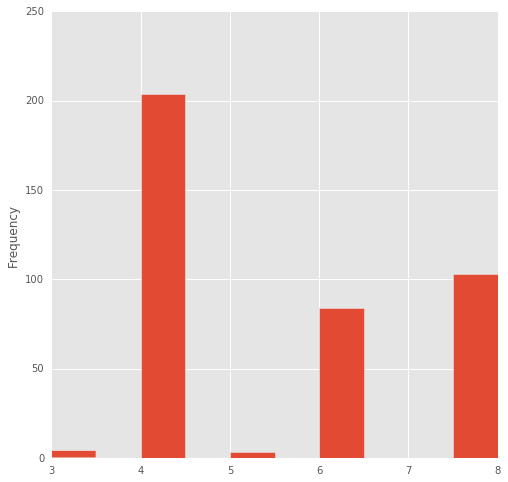

In [176]:
df.cylinders.plot(kind = 'hist', figsize = (8, 8))

In [177]:
df.corr().cylinders

mpg              -0.775396
cylinders         1.000000
displacement      0.950721
horsepower        0.842983
weight            0.896017
                    ...   
horsepwer_log     0.843204
weight_log        0.882085
mpg_log          -0.825758
horsepower_inv   -0.793819
gpm               0.839278
Name: cylinders, dtype: float64

In [178]:
df[['gpm','displacement_sqrt', 'horsepower_sqrt','weight']].corr()

,gpm,displacement_sqrt,horsepower_sqrt,weight
gpm,1.000000,0.866133,0.859499,0.885219
displacement_sqrt,0.866133,1.000000,0.886470,0.939395
horsepower_sqrt,0.859499,0.886470,1.000000,0.875859
weight,0.885219,0.939395,0.875859,1.000000


In [179]:
df[['gpm','displacement', 'horsepower','weight']].corr()

,gpm,displacement,horsepower,weight
gpm,1.000000,0.866631,0.854809,0.885219
displacement,0.866631,1.000000,0.897257,0.932824
horsepower,0.854809,0.897257,1.000000,0.864538
weight,0.885219,0.932824,0.864538,1.000000


In [180]:
model = smf.ols(formula = 'gpm ~ displacement_sqrt + horsepower_sqrt + weight', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     569.9
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          9.18e-142
Time:                        21:14:24   Log-Likelihood:                 1380.7
No. Observations:                 392   AIC:                            -2753.
Df Residuals:                     388   BIC:                            -2737.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -0.0187      0.002     -7.903      0.000        -0.023    -0.014
displacement_sqrt     0.0005      0.000      1.583      0.114        -0.000     0.001
horsepower_sqrt       0.0031      0.000      6.776      0.000         0.002     0.004
weight             9.627e-06    1.3e-06      7.425      0.000      7.08e-06  1.22e-05
==============================================================================
Omnibus:                       29.048   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.117
Skew:                           0.448   Prob(JB):                     1.77e-12
Kurtosis:                       4.584   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
df['displacement_cuberoot']= df.displacement ** (1/3)

In [182]:
model = smf.ols(formula = 'gpm ~ displacement_cuberoot + horsepower_sqrt + weight', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     850.4
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          9.72e-143
Time:                        21:14:26   Log-Likelihood:                 1379.4
No. Observations:                 392   AIC:                            -2753.
Df Residuals:                     389   BIC:                            -2741.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                -0.0096      0.001     -8.206      0.000        -0.012    -0.007
displacement_cuberoot    -0.0096      0.001     -8.206      0.000        -0.012    -0.007
horsepower_sqrt           0.0034      0.000      7.987      0.000         0.003     0.004
weight                 1.113e-05   8.88e-07     12.529      0.000      9.38e-06  1.29e-05
==============================================================================
Omnibus:                       26.012   Durbin-Watson:                   1.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.046
Skew:                           0.452   Prob(JB):                     7.41e-10
Kurtosis:                       4.326   Cond. No.                     9.56e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.11e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [183]:
model = smf.ols(formula = 'gpm ~ model_year + horsepower + weight', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     956.8
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          7.61e-179
Time:                        21:14:27   Log-Likelihood:                 1467.0
No. Observations:                 392   AIC:                            -2926.
Df Residuals:                     388   BIC:                            -2910.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0997      0.007     14.192      0.000         0.086     0.114
model_year    -0.0013   8.76e-05    -14.640      0.000        -0.001    -0.001
horsepower  8.099e-05   1.59e-05      5.106      0.000      4.98e-05     0.000
weight      1.245e-05   6.87e-07     18.113      0.000      1.11e-05  1.38e-05
==============================================================================
Omnibus:                       64.559   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.012
Skew:                           0.803   Prob(JB):                     1.47e-36
Kurtosis:                       5.743   Cond. No.                     7.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:

df = pd.read_csv('auto-mpg.csv')

In [185]:
df['gpm'] = 1. / df.mpg

In [186]:
df['horsepower_sqrt'] = np.sqrt(df.horsepower)

In [187]:

 
df = df.dropna(axis = 0, subset = ['gpm', 'displacement', 'horsepower_sqrt', 'weight'])

In [188]:
train_df = df.sample(frac = .6, random_state = 1)

In [189]:
test_df = df.drop(train_df.index)

In [193]:
 
train_X = train_df[ ['cylinders', 'horsepower_sqrt', 'weight'] ]
train_y = train_df['gpm']

 
model = linear_model.LinearRegression()

  
model = linear_model.LinearRegression()
model.fit(train_X, train_y)
print model.score(train_X, train_y)
print cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.812602532292
0.787735316391
